In [245]:
import pandas as pd
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt
%matplotlib inline

We can model the decision boundary and the classification output in the Heaviside step function as follows:

In [246]:
def Heavy_step(w,x):
    """
    w, x: Vectors weights and input
    b: bias term
    """
    X = np.dot(w,x) 
    return 1.0 if X > 0.0 else 0.0

def rand_cluster(n,c,r):
    """returns n random points in disk of radius r centered at c"""
    x,y = c
    points = []
    for i in range(n):
        theta = 2*math.pi*random()
        s = r*random()
        points.append((x+s*math.cos(theta), 6*y+s*math.sin(theta)))
    return points

def cost_function(d,y):
    #d = label, y = output heavystep
    # both are vectors
    s = len(y)
    cost = 1/s * np.sum(np.abs(d-y))
    return cost

def update_weights(x,w,y,d,step):
    # x : input
    # w : weights
    # y : prediction
    # d : original label
    # step : size of the update step
    step = 0.1
    w = w+step*(d-y)*x
    return w

def predict_fun(row, weights):
    activation = weights[0]
    for i in range(len(row)-1): 
        activation += weights[i+1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

def f(z):
    return 1 / (1 + np.exp(-z))

def dfdz(z):
    return f(z) * (1 - f(z))

def update_weights_sig(x,w):
    return f(np.dot(x,w))

In [247]:
A = rand_cluster(500,(1,1),3)
B = rand_cluster(500,(4,2),3)

data = pd.DataFrame(A, columns=['x','y'])
data['label'] = 0
data = data.append(pd.DataFrame(B,columns=['x','y']))
data.loc[data['label'].isnull(),'label'] = 1
data.reset_index(drop=True, inplace=True)
data['bias'] = np.ones((len(data),1))
data.head()

,label,x,y,bias
0,0.0,0.072194,6.484988,1.0
1,0.0,2.531419,4.411418,1.0
2,0.0,2.637989,6.947245,1.0
3,0.0,0.295111,3.723394,1.0
4,0.0,0.075906,6.394571,1.0


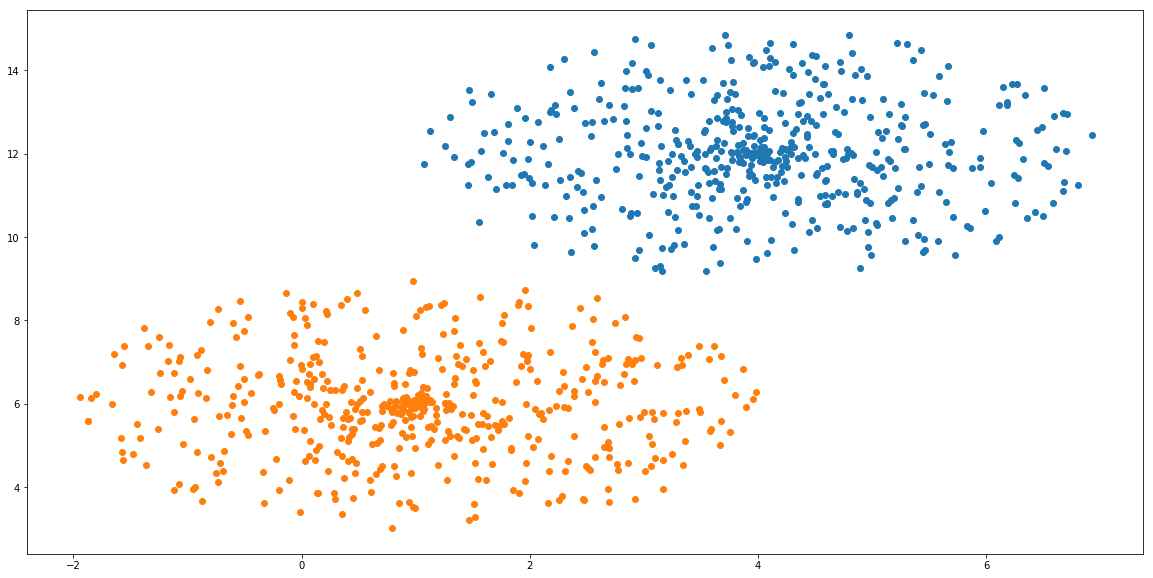

In [248]:
plt.figure(figsize=(20,10))
# plt.scatter(data.loc[data['label']=='A','x'],data.loc[data['label']=='A','y'], 'r')
plt.scatter(data.loc[data['label']==1,'x'],data.loc[data['label']==1,'y'])
plt.scatter(data.loc[data['label']==0,'x'],data.loc[data['label']==0,'y'])

In [249]:
# initialize
weights = np.zeros((3,)) # weights
step = 0.01

In [250]:
predict = np.zeros((len(data),))
for epoch in range(300):
    i=0
    for row in data[['bias','x','y']].values:
#     for N in range(len(data)):
        predict[i] = Heavy_step(weights,row)
        weights = update_weights(np.array(row),
                       weights,predict[i],data.loc[i,'label'],step)
        i+=1
#     print(weights)

In [251]:
y_pred=np.zeros((len(newdata),))
for N in range(len(newdata)):
    y_pred[N] = Heavy_step(weights,np.array(data.loc[N,['bias','x','y']]))
data['pred'] = y_pred

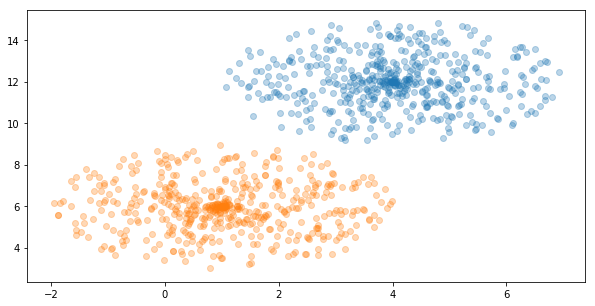

In [252]:
plt.figure(figsize=(10,5))
plt.scatter(data.loc[data['pred']==1,'x'],
            data.loc[data['pred']==1,'y'],alpha=0.3)
plt.scatter(data.loc[data['pred']==0,'x'],
            data.loc[data['pred']==0,'y'],alpha=0.3)

In [253]:
A = rand_cluster(500,(1,1),5)
B = rand_cluster(500,(4,2),5)

newdata = pd.DataFrame(A, columns=['x','y'])
newdata['label'] = 0
newdata = newdata.append(pd.DataFrame(B,columns=['x','y']))
newdata.loc[newdata['label'].isnull(),'label'] = 1
newdata.reset_index(drop=True, inplace=True)
newdata['bias'] = np.ones((len(data),1))
newdata.head()

,label,x,y,bias
0,0.0,-1.439554,6.380919,1.0
1,0.0,-0.192421,5.261931,1.0
2,0.0,3.960857,5.771132,1.0
3,0.0,0.687266,8.511360,1.0
4,0.0,5.096993,7.055603,1.0


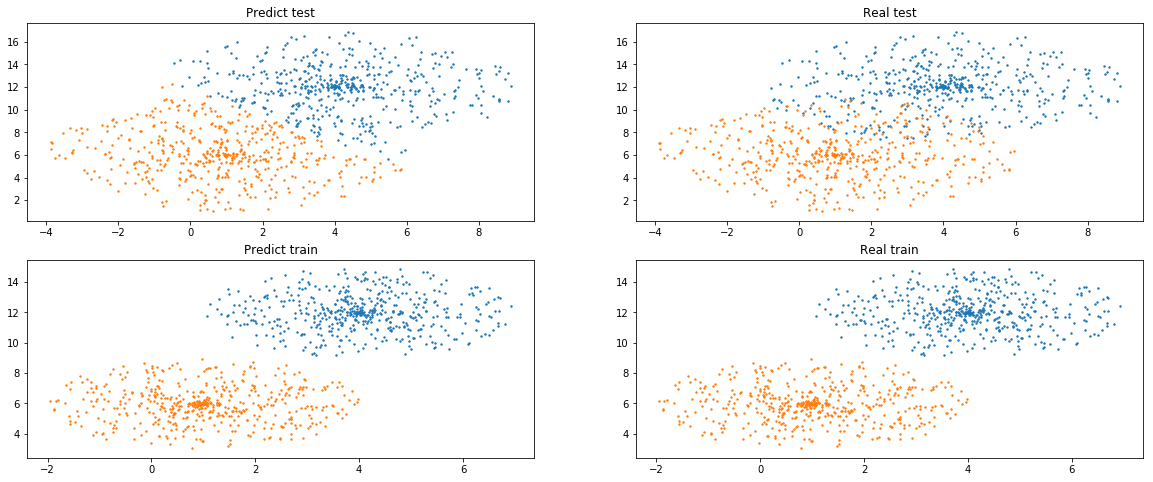

In [254]:
y2 = np.zeros((len(newdata),))
for N in range(len(newdata)):
    y2[N] = Heavy_step(weights,np.array(newdata.loc[N,['bias','x','y']]))
newdata['pred'] = y2
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.title('Predict test')
# plt.scatter(data.loc[data['label']=='A','x'],data.loc[data['label']=='A','y'], 'r')
plt.scatter(newdata.loc[newdata['pred']==1,'x'],
            newdata.loc[newdata['pred']==1,'y'],s=2)
plt.scatter(newdata.loc[newdata['pred']==0,'x'],
            newdata.loc[newdata['pred']==0,'y'],s=2)

plt.subplot(2,2,2)
plt.title('Real test')
plt.scatter(newdata.loc[newdata['label']==1,'x'],
            newdata.loc[newdata['label']==1,'y'],s=2)
plt.scatter(newdata.loc[newdata['label']==0,'x'],
            newdata.loc[newdata['label']==0,'y'],s=2)
plt.subplot(2,2,3)
plt.title('Predict train')
plt.scatter(data.loc[data['pred']==1,'x'],
            data.loc[data['pred']==1,'y'],s=2)
plt.scatter(data.loc[data['pred']==0,'x'],
            data.loc[data['pred']==0,'y'],s=2)

plt.subplot(2,2,4)
plt.title('Real train')
plt.scatter(data.loc[data['label']==1,'x'],
            data.loc[data['label']==1,'y'],s=2)
plt.scatter(data.loc[data['label']==0,'x'],
            data.loc[data['label']==0,'y'],s=2)

In [255]:
print(np.round((((data['pred'] == 0) & (data['label'] == 0)).sum()
+((data['pred'] == 1) & (data['label'] == 1)).sum())/len(data),3)*100,'% accuracy on train set')

print(np.round((((newdata['pred'] == 0) & (newdata['label'] == 0)).sum()
+((newdata['pred'] == 1) & (newdata['label'] == 1)).sum())/len(newdata),3)*100,'% accuracy on test set')

100.0 % accuracy on train set
90.9 % accuracy on test set


In [262]:
x = np.linspace(-3,4)
y = np.linspace(3,15)
fun_map = np.empty((x.size, y.size))
for n,i in enumerate(x):
    for m,j in enumerate(y):
        fun_map[m,n] = Heavy_step([1,i,j], weights)

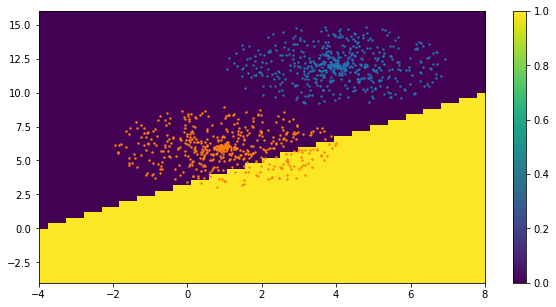

In [265]:
plt.figure(figsize=(10,5))
plt.imshow(fun_map, extent=[x1.min(),x1.max(),x2.min(),x2.max()], 
           vmin=0, vmax=1, aspect='auto')
plt.colorbar()
plt.scatter(data.loc[data['label']==1,'x'],
            data.loc[data['label']==1,'y'],s=2)
plt.scatter(data.loc[data['label']==0,'x'],
            data.loc[data['label']==0,'y'],s=2)


#### Trying the same thing m sigmoid

In [299]:
def f(z):
    return 1 / (1 + np.exp(-z))

def dfdz(z):
    return f(z) * (1 - f(z))

def loss(y, yhat):
    return -(yhat * np.log(y) + (1-yhat) * np.log(1-y))

def dfloss(y, yhat):
    return (1-yhat)/(1-y) - yhat/y

def forward(x, w):
    return f(np.dot(x, w))

## Option one: use the given derivatives (clearer)
def backward1(x, w, y, yhat):
    z = np.dot(x, w)
    dzdw = x
    return dJdy(y, yhat) * dfdz(z) * dzdw

## Option two: use the explicit calculted form (faster)
def backward2(x, y, yhat):  # w not needed for this form
    return ( y*(1-yhat) - yhat*(1-y) ) * x

def update(w, alpha, step):
    return w - alpha * step

In [406]:
def traindem(X, yhat, n_epoch, step, weights):
    
    predict = np.zeros((len(data),))
    
    costs = np.zeros(shape=(n_epoch,))
    
    for epoch in range(n_epoch):
        for i, row in enumerate(X):
            predict[i] = forward(row,weights)
            dw = backward2(np.array(row), predict[i],yhat[i])
            weights = update(weights,step,dw)
        predictions = forward(X, weights)
        costs[epoch] = np.mean(J(predictions, yhat))

        if ((epoch % 50) == 0) or (epoch == (n_epoch - 1)):
                accuracy = np.mean(predictions.round() == yhat)  # current accuracy on entire set
                print('Training accuracy after epoch {}: {:.4%}.'.format(epoch, accuracy))
    return weights, costs, np.round(predictions)

In [407]:
# Initialize
weights = np.zeros((3,)) # weights
step = 0.001
yhat = newdata['label']
X = data[['bias','x','y']].values

w, costs, ynew = traindem(X, yhat,1000,step,weights)

Training accuracy after epoch 0: 50.0000%.
Training accuracy after epoch 50: 68.8000%.
Training accuracy after epoch 100: 85.6000%.
Training accuracy after epoch 150: 91.1000%.
Training accuracy after epoch 200: 94.8000%.
Training accuracy after epoch 250: 95.9000%.
Training accuracy after epoch 300: 97.2000%.
Training accuracy after epoch 350: 97.9000%.
Training accuracy after epoch 400: 98.2000%.
Training accuracy after epoch 450: 98.9000%.
Training accuracy after epoch 500: 99.2000%.
Training accuracy after epoch 550: 99.4000%.
Training accuracy after epoch 600: 99.5000%.
Training accuracy after epoch 650: 99.6000%.
Training accuracy after epoch 700: 99.7000%.
Training accuracy after epoch 750: 99.8000%.
Training accuracy after epoch 800: 99.9000%.
Training accuracy after epoch 850: 99.9000%.
Training accuracy after epoch 900: 99.9000%.
Training accuracy after epoch 950: 99.9000%.
Training accuracy after epoch 999: 99.9000%.


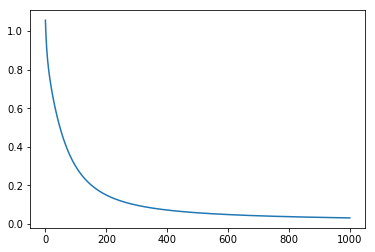

In [408]:
plt.plot(costs)

In [409]:
xh = np.linspace(-3,8,100)
yh = np.linspace(0,16,100)
heatmap = np.zeros((len(xh),len(yh)))

for n, i in enumerate(xh):
    for m, j in enumerate(yh):
        heatmap[m,n] = forward([1,i,j],w)
#         print(np.round((i,j),2),heatmap[m,n])


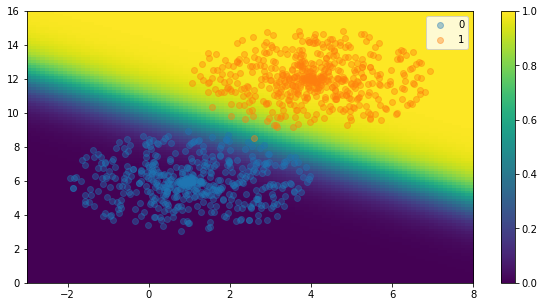

In [410]:
plt.figure(figsize=(10,5))
plt.imshow(heatmap, extent=[xh.min(),xh.max(),yh.min(),yh.max()], 
           vmin=0, vmax=1, aspect='auto',origin='lower')
plt.colorbar()
plt.scatter(*X[ynew==0][:,1:].T, label='0', alpha=0.4); 
plt.scatter(*X[ynew==1][:,1:].T, label='1', alpha=0.4)
plt.legend();plt.legend();

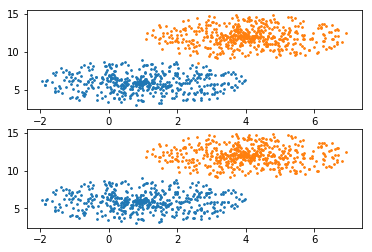

In [411]:
ynew = np.zeros(len(X),)
for i,row in enumerate(X):
    ynew[i] = np.round(forward(row,w))

plt.subplot(2,1,1)
plt.scatter(*X[ynew==0][:,1:].T,s=3)
plt.scatter(*X[ynew==1][:,1:].T,s=3)

plt.subplot(2,1,2)
plt.scatter(*X[yhat==0][:,1:].T,s=3)
plt.scatter(*X[yhat==1][:,1:].T,s=3)


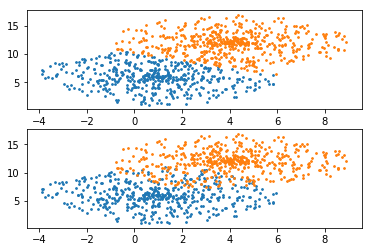

In [412]:
X_test = newdata[['bias','x','y']].values
yhat = newdata['label'].values
y_test = np.zeros(len(X_test),)
for i,row in enumerate(X_test):
    y_test[i] = np.round(forward(row,w))

plt.subplot(2,1,1)
plt.scatter(*X_test[y_test==0][:,1:].T,s=3)
plt.scatter(*X_test[y_test==1][:,1:].T,s=3)

plt.subplot(2,1,2)
plt.scatter(*X_test[yhat==0][:,1:].T,s=3)
plt.scatter(*X_test[yhat==1][:,1:].T,s=3)
